In [189]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.mplot3d import Axes3D

In [190]:
# Some basic functions for data analysis
def BasicPlotter(data, xlabel, title, binSize = 1000):
    plt.hist(data, bins = binSize)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.savefig('images/'+title+'.png')
    plt.show()

def BasicPlotter2D(xData, yData, xlabel, ylabel, title, bins = 100):
    hist, xedges, yedges = np.histogram2d(xData, yData, bins=bins)
    plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto')
    plt.colorbar()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig('images/'+title+'.png')
    plt.show()

def BasicPlotter3D(xPos, yPos, zPos, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xPos, yPos, zPos, c='b', marker='o')
    ax.set_xlabel('X Position (mm)')
    ax.set_ylabel('Y Position (mm)')
    ax.set_zlabel('Z Position (mm)')
    ax.set_box_aspect([1, 1, 3])
    plt.title(title)
    plt.savefig('images/'+title+'.png')
    plt.show()

In [191]:
# Extract data from csv file
xPosCoil = []
yPosCoil = []
zPosCoil = []
timeCoil = []
stepCoil = []
copyNoCoil = []

xPosFiber = []
yPosFiber = []
zPosFiber = []
timeFiber = []
stepFiber = []

lineNumberCoil = 0
lineNumberFiber = 0
with open('G4CoilDataStep.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        volume = row[5]
        if volume == 'G4CoilPV':
            xPosCoil.append(float(row[0]))
            yPosCoil.append(float(row[1]))
            zPosCoil.append(float(row[2]))
            timeCoil.append(float(row[3]))
            stepCoil.append(float(row[4]))
            # copyNoCoil.append(float(row[6]))
            lineNumberCoil += 1
        # elif volume == 'FiberPV':
        #     xPosFiber.append(float(row[0]))
        #     yPosFiber.append(float(row[1]))
        #     zPosFiber.append(float(row[2]))
        #     timeFiber.append(float(row[3]))
        #     stepFiber.append(float(row[4]))
        #     lineNumberFiber += 1

In [192]:
# BasicPlotter(copyNoCoil, 'Copy Number', 'Photons in Copy of Coil')

In [193]:
# Overall Data from the coil
# print('Total number of lines:', lineNumberCoil)

# BasicPlotter(xPosCoil, 'x Position (mm)', 'Photon x Position (Coil)')
# BasicPlotter(yPosCoil, 'y Position (mm)', 'Photon y Position (Coil)')
# BasicPlotter(zPosCoil, 'z Position (mm)', 'Photon z Position (Coil)')
# BasicPlotter(timeCoil, 'time (ns)', 'time (Coil)')
# BasicPlotter(stepCoil, 'step', 'step (Coil)')
# BasicPlotter2D(xPosCoil, yPosCoil, 'x Position (mm)', 'y Position (mm)', 'Photon Position (Coil)', 250)
# BasicPlotter2D(xPosCoil, zPosCoil, 'x Position (mm)', 'z Position (mm)', 'Photon Position (Coil)', 250)
# BasicPlotter2D(yPosCoil, zPosCoil, 'y Position (mm)', 'z Position (mm)', 'Photon Position (Coil)', 250)


In [194]:
# Overall Data from the fiber
# print('Total number of lines:', lineNumberFiber)

# BasicPlotter(xPosFiber, 'x Position (mm)', 'Photon x Position (Fiber)')
# BasicPlotter(yPosFiber, 'y Position (mm)', 'Photon y Position (Fiber)')
# BasicPlotter(zPosFiber, 'z Position (mm)', 'Photon z Position (Fiber)')
# BasicPlotter(timeFiber, 'time (ns)', 'time (Fiber)')
# BasicPlotter(stepFiber, 'step', 'step (Fiber)')
# BasicPlotter2D(xPosFiber, yPosFiber, 'x Position (mm)', 'y Position (mm)', 'Photon Position (Fiber)', 250)
# BasicPlotter2D(xPosFiber, zPosFiber, 'x Position (mm)', 'z Position (mm)', 'Photon Position (Fiber)', 250)
# BasicPlotter2D(yPosFiber, zPosFiber, 'y Position (mm)', 'z Position (mm)', 'Photon Position (Fiber)', 250)


Total number of photons in coil(Start): 11
Total number of photons in coil(End): 10
Total number of photon that made it to the detector: 9


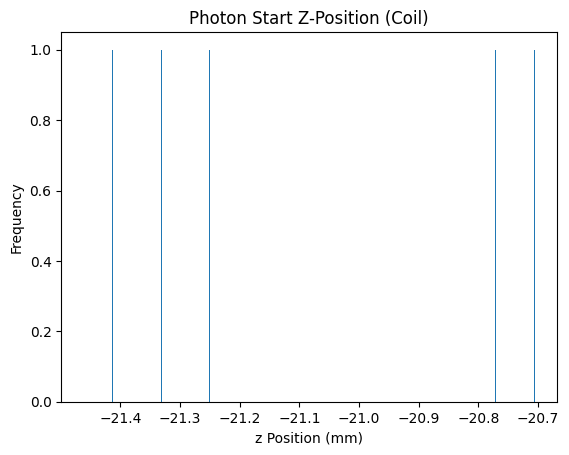

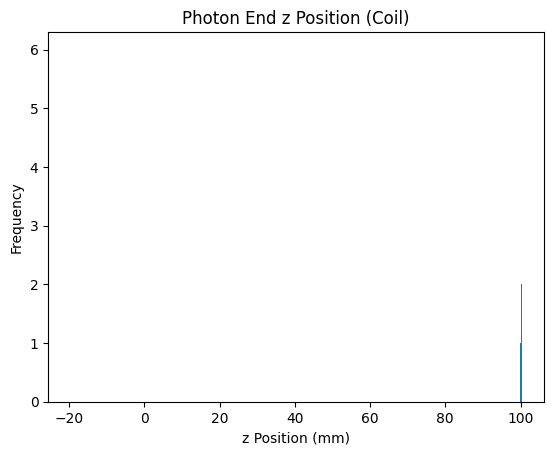

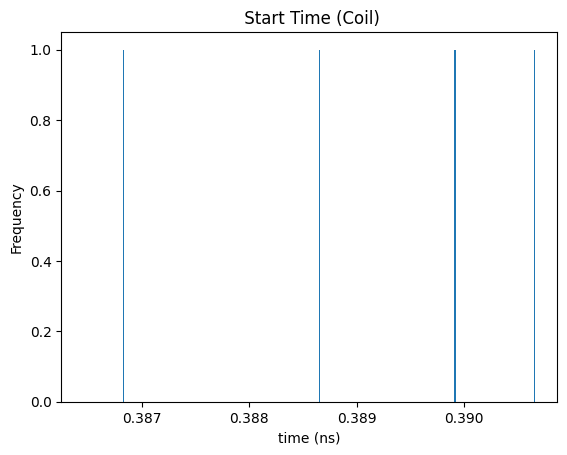

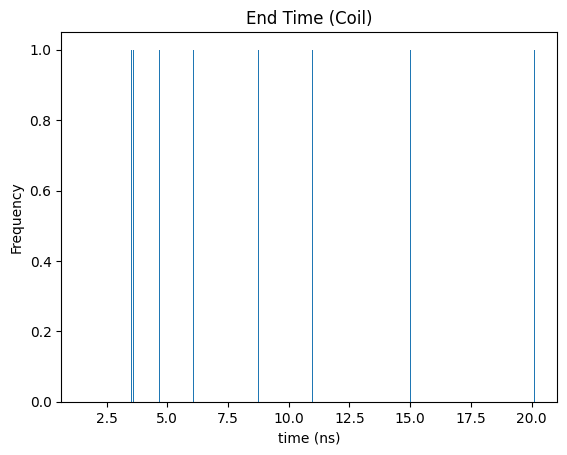

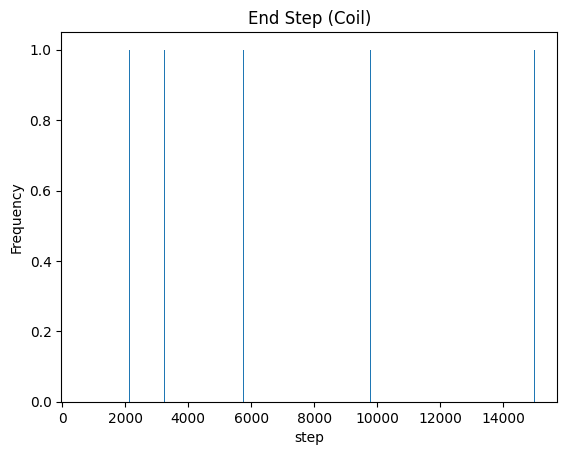

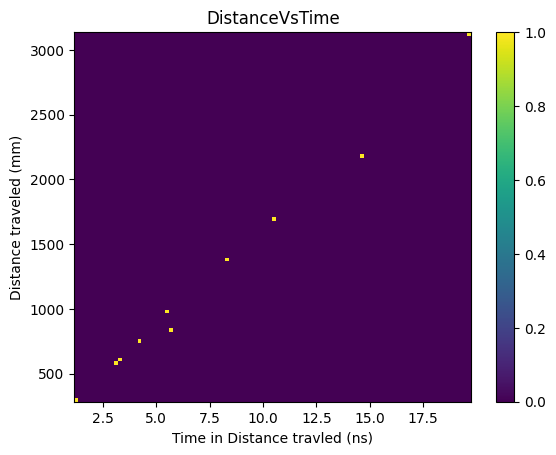

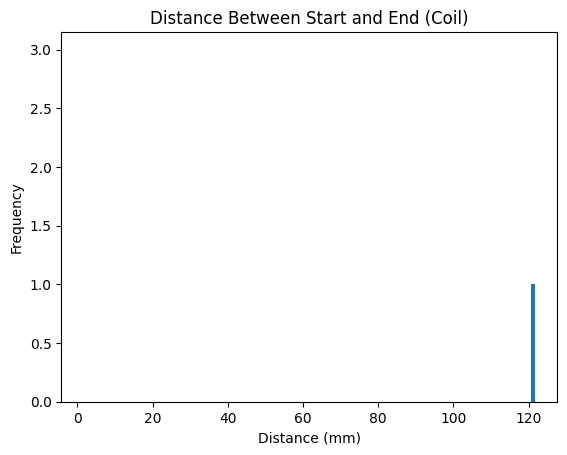

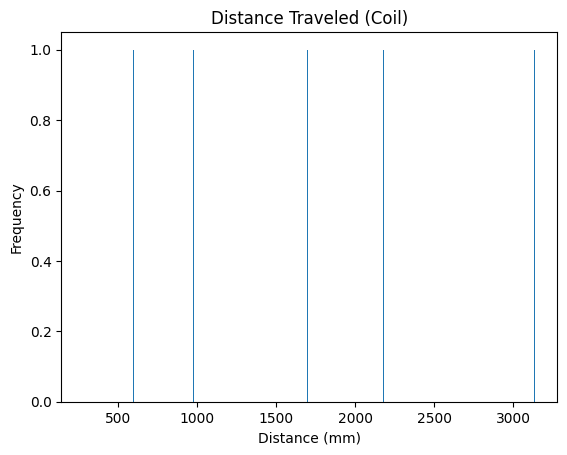

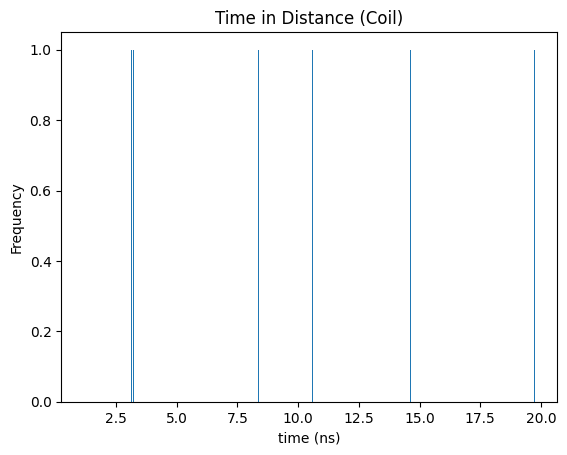

In [195]:
# Looking at photon lifespan and step taken/distance traveled in each object
endZpos = []
endstep = []
endtime = []

photonDetCounter = 0
photonDetStep = []
photonDetTime = []
photonDetStartZpos = []
photonDetEndZpos = []
photonDetDistanceStartEnd = []
photonDetDistance = []
photonDetTimeInDistance = []

newPhotonZpos = []
newTime = []

distanceBetweenStartEnd = []
distanceTraveledHisto = []
TimeInDistance = []
distanceTraveled = 0


for i in range(len(zPosCoil)-1):
    if (stepCoil[i+1]-stepCoil[i]) < 0:
        endZpos.append(zPosCoil[i])
        endstep.append(stepCoil[i])
        endtime.append(timeCoil[i])

        distanceBetweenStartEnd.append(zPosCoil[i] - newPhotonZpos[-1])
        distanceTraveledHisto.append(distanceTraveled)
        TimeInDistance.append(timeCoil[i] - newTime[-1])

        if zPosCoil[i] > 90:
            photonDetCounter += 1
            photonDetStep.append(stepCoil[i])
            photonDetTime.append(timeCoil[i])

            photonDetStartZpos.append(newPhotonZpos[-1])
            photonDetEndZpos.append(zPosCoil[i])

            photonDetDistanceStartEnd.append(zPosCoil[i] - newPhotonZpos[-1])
            photonDetDistance.append(distanceTraveled)
            photonDetTimeInDistance.append(timeCoil[i] - newTime[-1])
        
        distanceTraveled = 0
    
    if stepCoil[i] == 1:
        newPhotonZpos.append(zPosCoil[i])
        newTime.append(timeCoil[i])
    
    distanceTraveled += abs(zPosCoil[i+1] - zPosCoil[i])


print('Total number of photons in coil(Start):', len(newPhotonZpos))
print('Total number of photons in coil(End):', len(endZpos))
print('Total number of photon that made it to the detector:', photonDetCounter)

BasicPlotter(newPhotonZpos, 'z Position (mm)', 'Photon Start Z-Position (Coil)')
BasicPlotter(endZpos, 'z Position (mm)', 'Photon End z Position (Coil)')
BasicPlotter(newTime, 'time (ns)', ' Start Time (Coil)')
BasicPlotter(endtime, 'time (ns)', 'End Time (Coil)')
BasicPlotter(endstep, 'step', 'End Step (Coil)')

BasicPlotter2D(TimeInDistance, distanceTraveledHisto , 'Time in Distance travled (ns)', 'Distance traveled (mm)', 'DistanceVsTime')

BasicPlotter(distanceBetweenStartEnd, 'Distance (mm)', 'Distance Between Start and End (Coil)')
BasicPlotter(distanceTraveledHisto, 'Distance (mm)', 'Distance Traveled (Coil)')
BasicPlotter(TimeInDistance, 'time (ns)', 'Time in Distance (Coil)')

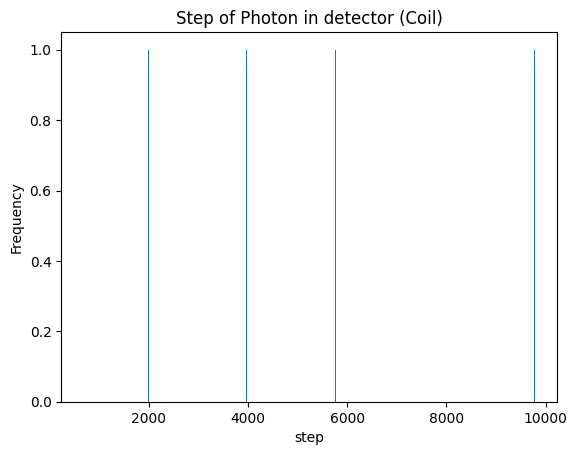

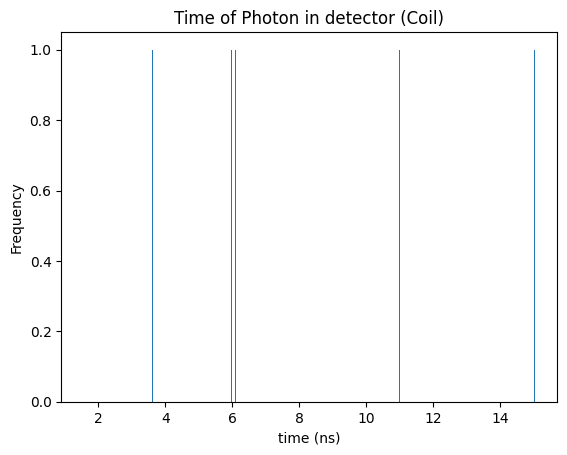

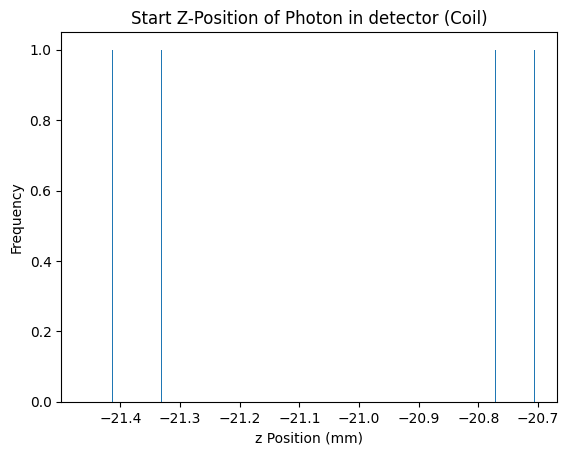

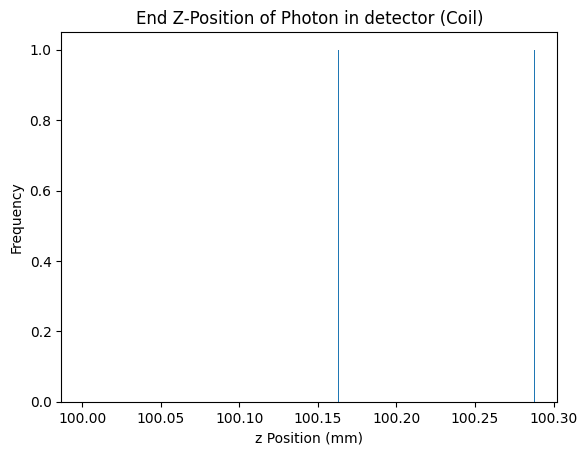

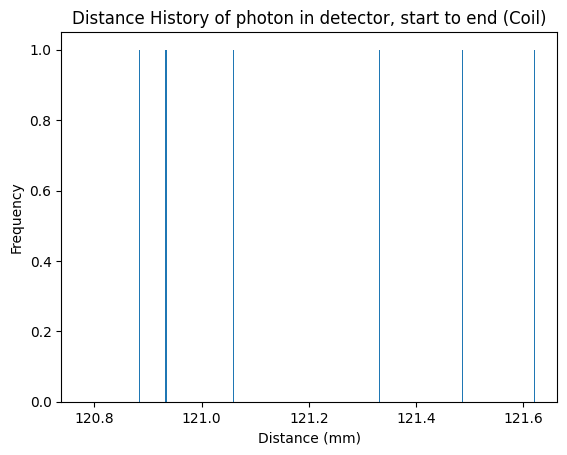

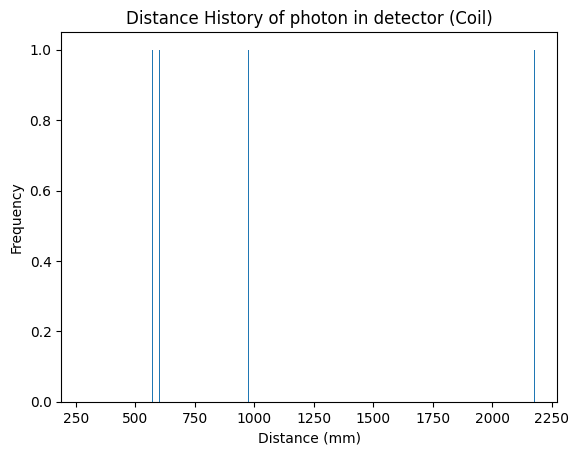

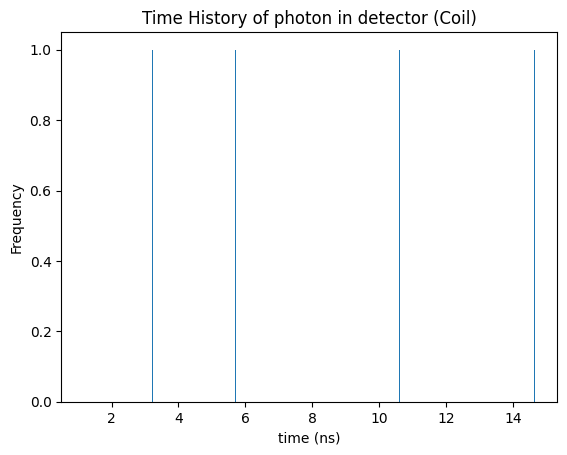

In [196]:
BasicPlotter(photonDetStep, 'step', 'Step of Photon in detector (Coil)')
BasicPlotter(photonDetTime, 'time (ns)', 'Time of Photon in detector (Coil)')
BasicPlotter(photonDetStartZpos, 'z Position (mm)', 'Start Z-Position of Photon in detector (Coil)')
BasicPlotter(photonDetEndZpos, 'z Position (mm)', 'End Z-Position of Photon in detector (Coil)')
BasicPlotter(photonDetDistanceStartEnd, 'Distance (mm)', 'Distance History of photon in detector, start to end (Coil)')
BasicPlotter(photonDetDistance, 'Distance (mm)', 'Distance History of photon in detector (Coil)')
BasicPlotter(photonDetTimeInDistance, 'time (ns)', 'Time History of photon in detector (Coil)')

In [197]:
# Start of photon time/step analyze in objects's Detector section
# timeInDetCoil = []
# timeInDetFiber = []
# stepInDetCoil = []
# stepInDetFiber = []

# for i in range(len(zPosCoil)):
#     if zPosCoil[i] > 90:
#         timeInDetCoil.append(timeCoil[i])
#         stepInDetCoil.append(stepCoil[i])

# for i in range(len(zPosFiber)):
#     if zPosFiber[i] > 90:
#         timeInDetFiber.append(timeFiber[i])
#         stepInDetFiber.append(stepFiber[i])

# print('Total number of photons in coil:', len(timeInDetCoil))
# print('Total number of photons in fiber:', len(timeInDetFiber))

# BasicPlotter(timeInDetCoil, 'Time (ns)', 'Time in detector (Coil)')
# BasicPlotter(timeInDetFiber, 'Time (ns)', 'Time in detector (Fiber)')
# BasicPlotter(stepInDetCoil, 'Step', 'Step in detector (Coil)')
# BasicPlotter(stepInDetFiber, 'Step', 'Step in detector (Fiber)')